In [6]:
import pandas as pd
import matplotlib.pyplot as plt
from parsel.xpathfuncs import regex

In [7]:
car_sales = pd.read_csv('car-sales.csv')
car_sales.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Toyota,White,150043,4,"$4,000.00"
1,Honda,Red,87899,4,"$5,000.00"
2,Toyota,Blue,32549,3,"$7,000.00"
3,BMW,Black,11179,5,"$22,000.00"
4,Nissan,White,213095,4,"$3,500.00"


In [8]:
car_sales[car_sales['Odometer (KM)']>100000]

,Make,Colour,Odometer (KM),Doors,Price
0,Toyota,White,150043,4,"$4,000.00"
4,Nissan,White,213095,4,"$3,500.00"


In [9]:
pd.crosstab(car_sales['Make'],car_sales['Doors'])

Doors,3,4,5
Make,,,
BMW,0,0,1
Honda,0,3,0
Nissan,0,2,0
Toyota,1,3,0


In [10]:
## group by

In [11]:
car_sales.groupby(['Make']).mean()

TypeError: agg function failed [how->mean,dtype->object]

In [12]:
car_sales.groupby(['Make']).mean(numeric_only=True)


,Odometer (KM),Doors
Make,,
BMW,11179.000000,5.00
Honda,62778.333333,4.00
Nissan,122347.500000,4.00
Toyota,85451.250000,3.75


<Axes: ylabel='Frequency'>

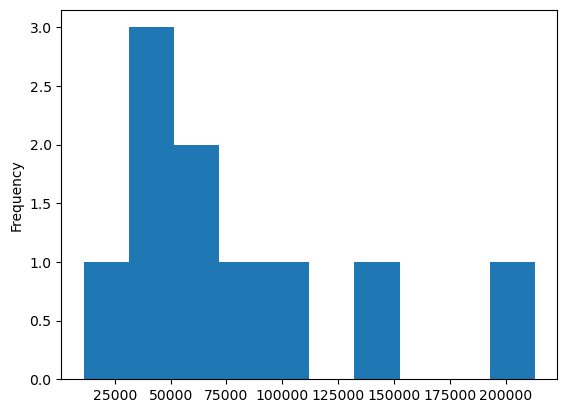

In [13]:
car_sales['Odometer (KM)'].plot(kind='hist')

<Axes: >

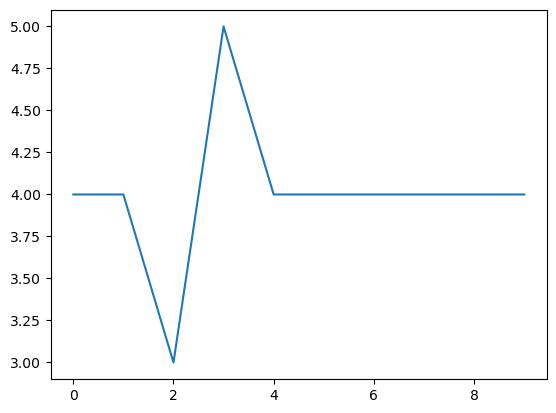

In [14]:
car_sales['Doors'].plot()

<Axes: >

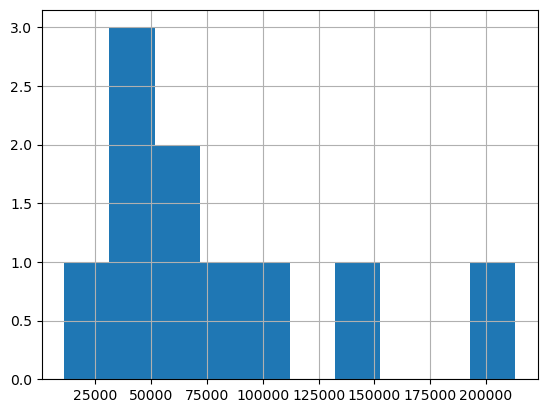

In [15]:
car_sales['Odometer (KM)'].hist()

In [16]:
car_sales['Price']

0     $4,000.00
1     $5,000.00
2     $7,000.00
3    $22,000.00
4     $3,500.00
5     $4,500.00
6     $7,500.00
7     $7,000.00
8     $6,250.00
9     $9,700.00
Name: Price, dtype: object

In [17]:
car_sales['Price'] = car_sales['Price'].astype(str).str.replace(r'[\$,]', '', regex=True).astype('float')
# Check the data types in the Price column
print(car_sales['Price'].dtype)

float64


In [18]:
car_sales['Price']


0     4000.0
1     5000.0
2     7000.0
3    22000.0
4     3500.0
5     4500.0
6     7500.0
7     7000.0
8     6250.0
9     9700.0
Name: Price, dtype: float64

<Axes: >

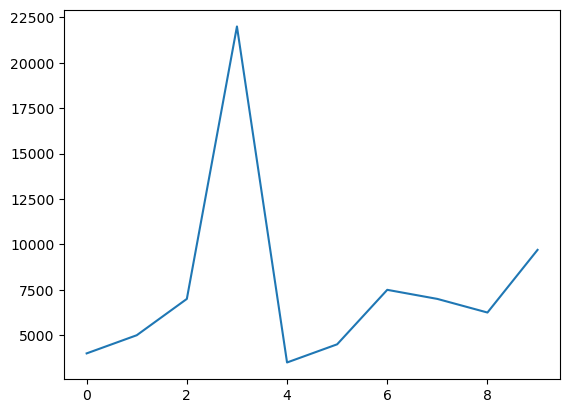

In [19]:
car_sales['Price'].plot()

In [19]:
## Manipulating Data

<Axes: >

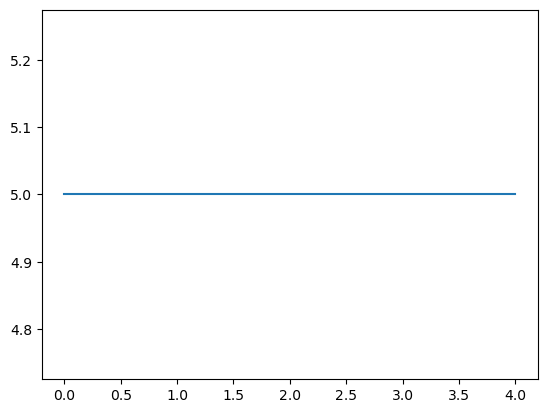

In [20]:
# column from series
seats_column= pd.Series([5,5,5,5,5])
#new Column called seats 
car_sales['Seats']=seats_column
car_sales['Seats'].plot()

In [22]:
car_sales

,Make,Colour,Odometer (KM),Doors,Price,Seats
0,Toyota,White,150043,4,4000.0,5.0
1,Honda,Red,87899,4,5000.0,5.0
2,Toyota,Blue,32549,3,7000.0,5.0
3,BMW,Black,11179,5,22000.0,5.0
4,Nissan,White,213095,4,3500.0,5.0
5,Toyota,Green,99213,4,4500.0,5.0
6,Honda,Blue,45698,4,7500.0,5.0
7,Honda,Blue,54738,4,7000.0,5.0
8,Toyota,White,60000,4,6250.0,5.0
9,Nissan,White,31600,4,9700.0,5.0


In [23]:
car_sales["Seats"].fillna(5,inplace=True)

In [24]:
car_sales

,Make,Colour,Odometer (KM),Doors,Price,Seats
0,Toyota,White,150043,4,4000.0,5.0
1,Honda,Red,87899,4,5000.0,5.0
2,Toyota,Blue,32549,3,7000.0,5.0
3,BMW,Black,11179,5,22000.0,5.0
4,Nissan,White,213095,4,3500.0,5.0
5,Toyota,Green,99213,4,4500.0,5.0
6,Honda,Blue,45698,4,7500.0,5.0
7,Honda,Blue,54738,4,7000.0,5.0
8,Toyota,White,60000,4,6250.0,5.0
9,Nissan,White,31600,4,9700.0,5.0


In [26]:
fuel_economy=[7.5,9.2,5.0,9.6,8.7,9.2,4.7,7.6,8.7,3.5]
car_sales['Fuel Economy']=fuel_economy

<Axes: >

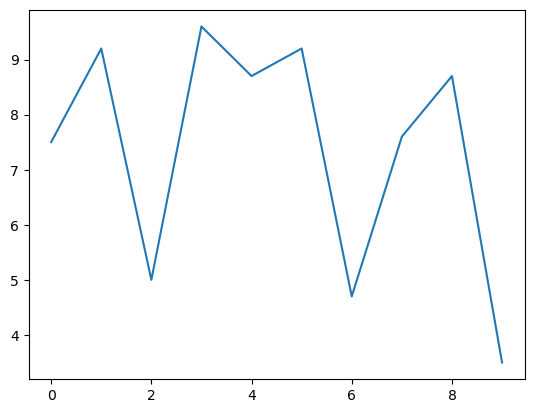

In [27]:
car_sales['Fuel Economy'].plot()

In [28]:
car_sales

,Make,Colour,Odometer (KM),Doors,Price,Seats,Fuel Economy
0,Toyota,White,150043,4,4000.0,5.0,7.5
1,Honda,Red,87899,4,5000.0,5.0,9.2
2,Toyota,Blue,32549,3,7000.0,5.0,5.0
3,BMW,Black,11179,5,22000.0,5.0,9.6
4,Nissan,White,213095,4,3500.0,5.0,8.7
5,Toyota,Green,99213,4,4500.0,5.0,9.2
6,Honda,Blue,45698,4,7500.0,5.0,4.7
7,Honda,Blue,54738,4,7000.0,5.0,7.6
8,Toyota,White,60000,4,6250.0,5.0,8.7
9,Nissan,White,31600,4,9700.0,5.0,3.5


In [30]:
car_sales['Fuel Used (L)'] = car_sales["Odometer (KM)"]/100 * car_sales["Fuel Economy"]

In [31]:
car_sales

,Make,Colour,Odometer (KM),Doors,Price,Seats,Fuel Economy,Fuel Used (L)
0,Toyota,White,150043,4,4000.0,5.0,7.5,11253.225
1,Honda,Red,87899,4,5000.0,5.0,9.2,8086.708
2,Toyota,Blue,32549,3,7000.0,5.0,5.0,1627.450
3,BMW,Black,11179,5,22000.0,5.0,9.6,1073.184
4,Nissan,White,213095,4,3500.0,5.0,8.7,18539.265
5,Toyota,Green,99213,4,4500.0,5.0,9.2,9127.596
6,Honda,Blue,45698,4,7500.0,5.0,4.7,2147.806
7,Honda,Blue,54738,4,7000.0,5.0,7.6,4160.088
8,Toyota,White,60000,4,6250.0,5.0,8.7,5220.000
9,Nissan,White,31600,4,9700.0,5.0,3.5,1106.000


In [32]:
car_sales['Passed Safety Test']=True

In [33]:
car_sales

,Make,Colour,Odometer (KM),Doors,Price,Seats,Fuel Economy,Fuel Used (L),Passed Safety Test
0,Toyota,White,150043,4,4000.0,5.0,7.5,11253.225,True
1,Honda,Red,87899,4,5000.0,5.0,9.2,8086.708,True
2,Toyota,Blue,32549,3,7000.0,5.0,5.0,1627.450,True
3,BMW,Black,11179,5,22000.0,5.0,9.6,1073.184,True
4,Nissan,White,213095,4,3500.0,5.0,8.7,18539.265,True
5,Toyota,Green,99213,4,4500.0,5.0,9.2,9127.596,True
6,Honda,Blue,45698,4,7500.0,5.0,4.7,2147.806,True
7,Honda,Blue,54738,4,7000.0,5.0,7.6,4160.088,True
8,Toyota,White,60000,4,6250.0,5.0,8.7,5220.000,True
9,Nissan,White,31600,4,9700.0,5.0,3.5,1106.000,True


In [34]:
car_sales.dtypes

Make                   object
Colour                 object
Odometer (KM)           int64
Doors                   int64
Price                 float64
Seats                 float64
Fuel Economy          float64
Fuel Used (L)         float64
Passed Safety Test       bool
dtype: object

In [35]:
car_sales.sample(frac=.5)

,Make,Colour,Odometer (KM),Doors,Price,Seats,Fuel Economy,Fuel Used (L),Passed Safety Test
2,Toyota,Blue,32549,3,7000.0,5.0,5.0,1627.450,True
1,Honda,Red,87899,4,5000.0,5.0,9.2,8086.708,True
0,Toyota,White,150043,4,4000.0,5.0,7.5,11253.225,True
9,Nissan,White,31600,4,9700.0,5.0,3.5,1106.000,True
7,Honda,Blue,54738,4,7000.0,5.0,7.6,4160.088,True


In [36]:
car_sales_suffled=car_sales.sample(frac=1)
car_sales_suffled

,Make,Colour,Odometer (KM),Doors,Price,Seats,Fuel Economy,Fuel Used (L),Passed Safety Test
9,Nissan,White,31600,4,9700.0,5.0,3.5,1106.000,True
4,Nissan,White,213095,4,3500.0,5.0,8.7,18539.265,True
3,BMW,Black,11179,5,22000.0,5.0,9.6,1073.184,True
8,Toyota,White,60000,4,6250.0,5.0,8.7,5220.000,True
7,Honda,Blue,54738,4,7000.0,5.0,7.6,4160.088,True
2,Toyota,Blue,32549,3,7000.0,5.0,5.0,1627.450,True
0,Toyota,White,150043,4,4000.0,5.0,7.5,11253.225,True
6,Honda,Blue,45698,4,7500.0,5.0,4.7,2147.806,True
1,Honda,Red,87899,4,5000.0,5.0,9.2,8086.708,True
5,Toyota,Green,99213,4,4500.0,5.0,9.2,9127.596,True


In [41]:
# Reset the index of the DataFrame
car_sales_suffled.reset_index(drop=True, inplace=True)
car_sales_suffled

,Make,Colour,Odometer (KM),Doors,Price,Seats,Fuel Economy,Fuel Used (L),Passed Safety Test
0,Nissan,White,31600,4,9700.0,5.0,3.5,1106.000,True
1,Nissan,White,213095,4,3500.0,5.0,8.7,18539.265,True
2,BMW,Black,11179,5,22000.0,5.0,9.6,1073.184,True
3,Toyota,White,60000,4,6250.0,5.0,8.7,5220.000,True
4,Honda,Blue,54738,4,7000.0,5.0,7.6,4160.088,True
5,Toyota,Blue,32549,3,7000.0,5.0,5.0,1627.450,True
6,Toyota,White,150043,4,4000.0,5.0,7.5,11253.225,True
7,Honda,Blue,45698,4,7500.0,5.0,4.7,2147.806,True
8,Honda,Red,87899,4,5000.0,5.0,9.2,8086.708,True
9,Toyota,Green,99213,4,4500.0,5.0,9.2,9127.596,True


In [42]:
car_sales["Odometer (KM)"]=car_sales["Odometer (KM)"].apply(lambda x: x/1.6)
car_sales

,Make,Colour,Odometer (KM),Doors,Price,Seats,Fuel Economy,Fuel Used (L),Passed Safety Test
0,Toyota,White,93776.875,4,4000.0,5.0,7.5,11253.225,True
1,Honda,Red,54936.875,4,5000.0,5.0,9.2,8086.708,True
2,Toyota,Blue,20343.125,3,7000.0,5.0,5.0,1627.450,True
3,BMW,Black,6986.875,5,22000.0,5.0,9.6,1073.184,True
4,Nissan,White,133184.375,4,3500.0,5.0,8.7,18539.265,True
5,Toyota,Green,62008.125,4,4500.0,5.0,9.2,9127.596,True
6,Honda,Blue,28561.250,4,7500.0,5.0,4.7,2147.806,True
7,Honda,Blue,34211.250,4,7000.0,5.0,7.6,4160.088,True
8,Toyota,White,37500.000,4,6250.0,5.0,8.7,5220.000,True
9,Nissan,White,19750.000,4,9700.0,5.0,3.5,1106.000,True


In [43]:
car_sales.rename(columns={"Odometer (KM)": "Odometer (Miles)"}, inplace=True)
car_sales

,Make,Colour,Odometer (Miles),Doors,Price,Seats,Fuel Economy,Fuel Used (L),Passed Safety Test
0,Toyota,White,93776.875,4,4000.0,5.0,7.5,11253.225,True
1,Honda,Red,54936.875,4,5000.0,5.0,9.2,8086.708,True
2,Toyota,Blue,20343.125,3,7000.0,5.0,5.0,1627.450,True
3,BMW,Black,6986.875,5,22000.0,5.0,9.6,1073.184,True
4,Nissan,White,133184.375,4,3500.0,5.0,8.7,18539.265,True
5,Toyota,Green,62008.125,4,4500.0,5.0,9.2,9127.596,True
6,Honda,Blue,28561.250,4,7500.0,5.0,4.7,2147.806,True
7,Honda,Blue,34211.250,4,7000.0,5.0,7.6,4160.088,True
8,Toyota,White,37500.000,4,6250.0,5.0,8.7,5220.000,True
9,Nissan,White,19750.000,4,9700.0,5.0,3.5,1106.000,True
